In [4]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = np.pi * 2

%matplotlib inline

In [5]:
def make_sine(offset):
    signal = thinkdsp.SinSignal(freq = 440, offset = offset)
    wave = signal.make_wave(duration = 0.5, framerate = 10000)
    return wave


No handles with labels found to put in legend.


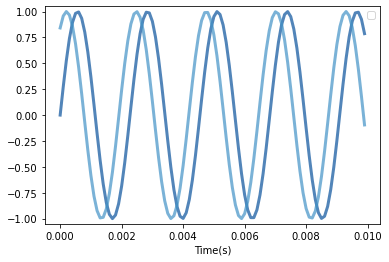

In [6]:
wave1 = make_sine(offset=0)
wave2 = make_sine(offset = 1)

thinkplot.preplot(2)
wave1.segment(duration=0.01).plot()
wave2.segment(duration = 0.01).plot()
thinkplot.config(xlabel='Time(s)', ylim=[-1.05, 1.05])

In [7]:
print(np.corrcoef(wave1.ys, wave2.ys)) #correlation matrix

[[1.         0.54030231]
 [0.54030231 1.        ]]


np.corrcoef는 두 파라미터의 웨이브의 상관관계를 matrix로 나타낸다. 

correlation matrix

+ [0][0] --> wave1, wave1의 상관관계(같은 웨이브이므로 상관관계가 1로 완전히 일치한다.
+ [1][0], [0][1] --> wave1, wave2의 상관관계
+ [1][1] --> wave2, wave2의 상관관계(같은 웨이브이므로 상관관계가 1로 완전히 일치한다.

In [8]:
wave1.corr(wave2)

0.5403023058681397

위와 같이 corr을 사용하면 wave1, wave2의 상관관계가 바로 출력된다. 

In [9]:
def compute_corr(offset):
    wave1 = make_sine(offset=0)
    wave2 = make_sine(offset=-offset)
    thinkplot.preplot(2)
    wave1.segment(duration=0.01).plot()
    wave2.segment(duration=0.01).plot()
    
    corr = wave1.corr(wave2)
    print("corr = ",corr)
    
    thinkplot.config(xlabel = "Time(s)", ylim=[-1.05,1.05])

**offset을 달리주어 corr을 확인하는 코드**

In [12]:
slider = widgets.FloatSlider(min=0, max=PI2, value = 1)
interact(compute_corr, offset=slider)

interactive(children=(FloatSlider(value=1.0, description='offset', max=6.283185307179586), Output()), _dom_cla…

<function __main__.compute_corr(offset)>

No handles with labels found to put in legend.


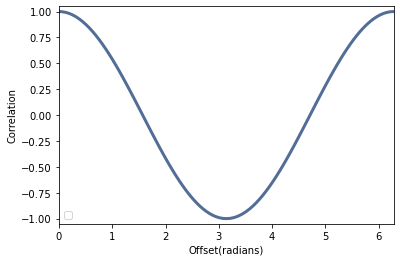

In [14]:
offsets = np.linspace(0,PI2, 101) #0부터 Pl2까지 101 등분

corrs = []
for offset in offsets:
    wave2 = make_sine(offset)
    corr = np.corrcoef(wave1.ys, wave2.ys)[0,1]
    corrs.append(corr)
    
thinkplot.plot(offsets, corrs) 
thinkplot.config(xlabel = "Offset(radians)", ylabel = "Correlation", axis = [0,PI2, -1.05, 1.05])

코사인의 모양이 관찰된다. 

### Brownian noise, UU noise, Pink noise와의 비교

In [15]:
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2, ddof=0)[0,1]
    return corr

In [16]:
signal = thinkdsp.UncorrelatedGaussianNoise()
wave = signal.make_wave(duration =0.5, framerate = 11025)
serial_corr(wave)

-0.02014982501346949

In [17]:
signal = thinkdsp.BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate = 11025)
serial_corr(wave)

0.999427368702901

In [18]:
signal = thinkdsp.PinkNoise()
wave = signal.make_wave(duration = 0.5, framerate = 11025)
serial_corr(wave)

0.7855238042706736

No handles with labels found to put in legend.


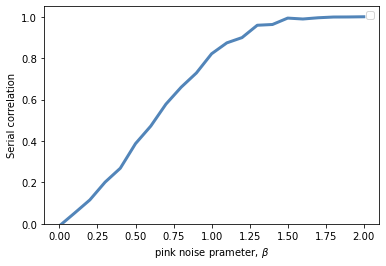

In [22]:
np.random.seed(19)

betas = np.linspace(0,2,21)
corrs=[]

for beta in betas:
    signal = thinkdsp.PinkNoise(beta=beta)
    wave = signal.make_wave(duration=1.0, framerate = 11025)
    corr = serial_corr(wave)
    corrs.append(corr)

thinkplot.preplot(1)
thinkplot.plot(betas, corrs)
thinkplot.config(xlabel=r"pink noise prameter, $\beta$",
               ylabel = 'Serial correlation',
               ylim=[0,1.05])

In [27]:
def autocorr(wave):
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave,lag)for lag in lags]
    return lags, corrs

In [28]:
def plot_pink_autocorr(beta, label):
    signal = thinkdsp.PinkNoise(beta=beta)
    wave = signal.make_wave(duration=1.0, framerate = 10000)
    lags, corrs = autocorr(wave)
    thinkplot.plot(lags, corrs, label=label)

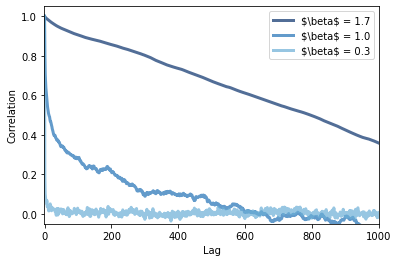

In [29]:
np.random.seed(19)
thinkplot.preplot(3)

for beta in [1.7, 1.0, 0.3]:
    label = r"$\beta\$ = %.1f" % beta
    plot_pink_autocorr(beta, label)
    
thinkplot.config(xlabel="Lag",
                ylabel="Correlation",
                xlim = [-1,1000],
                ylim=[-0.05, 1.05],
                legend = True)